In [6]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]='1'
from run_inference import inference_single_image
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

/home/test/miniconda/envs/anydoor/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


logging improved.
ControlLDM: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 1024 and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 1024 and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 1024 and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 1024 and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 20 heads.
Setting up MemoryEfficientCrossAttention. 

In [7]:
def prepare_model_input(image_name, masks_dir, images_dir):
    ref_mask_path = os.path.join(masks_dir, image_name)
    ref_image_path = os.path.join(images_dir, image_name)

    ref_mask = cv2.imread(ref_mask_path)
    ref_mask = cv2.cvtColor(ref_mask, cv2.COLOR_BGR2GRAY)

    ref_image = cv2.imread(ref_image_path)
    ref_image = cv2.cvtColor(ref_image, cv2.COLOR_BGR2RGB)

    ref_mask = (ref_mask > 0).astype(np.uint8)
    tar_mask = ref_mask.copy()
    tar_image = ref_image.copy()

    return ref_image, ref_mask, tar_image, tar_mask


In [20]:
ref_image, ref_mask, tar_image, tar_mask = prepare_model_input(
    image_name="22_512x640.png", 
    masks_dir="/data/om/reflection_anydoor/dataset/test/masks", 
    images_dir="/data/om/reflection_anydoor/dataset/test/images")

/home/test/miniconda/envs/anydoor/lib/python3.8/site-packages/xformers/ops/unbind.py:46: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage_data_ptr = tensors[0].storage().data_ptr()
/home/test/miniconda/envs/anydoor/lib/python3.8/site-packages/xformers/ops/unbind.py:48: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  if x.storage().data_ptr() != storage_data_ptr:


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.30it/s]


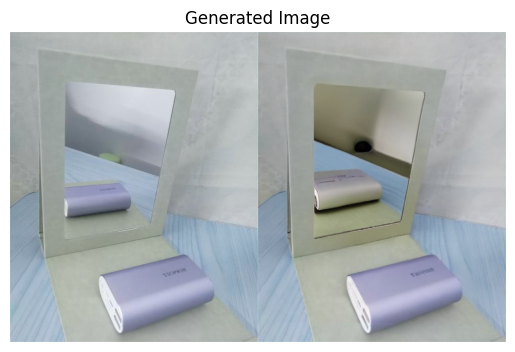

In [9]:
import random
random.seed(42)

gen_image = inference_single_image(ref_image, ref_mask, tar_image, tar_mask)
# gen_path = os.path.join(save_dir, image_name)
vis_image = cv2.hconcat([ref_image, gen_image])
plt.imshow(cv2.cvtColor(vis_image, cv2.COLOR_BGR2RGB))
plt.title("Generated Image")
plt.axis('off')  # Hide the axis
plt.show()

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.33it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.31it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.33it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.30it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.30it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.27it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.27it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.25it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.24it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.22it/s]


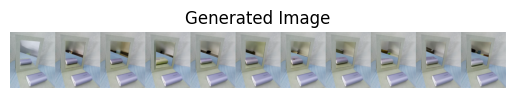

In [10]:
import random

gen_images = []
for i in range(10):
    random.seed(random.randint(0, 10000))
    gen_image = inference_single_image(ref_image, ref_mask, tar_image, tar_mask)
    # gen_path = os.path.join(save_dir, image_name)
    gen_images.append(gen_image)

vis_image = cv2.hconcat([ref_image]+gen_images)

plt.imshow(cv2.cvtColor(vis_image, cv2.COLOR_BGR2RGB))
plt.title("Generated Image")
plt.axis('off')  # Hide the axis
plt.show()

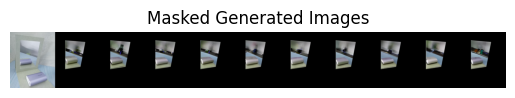

In [23]:
import numpy as np

# Generate images using the mask to modify the generated images
masked_gen_images = []
for img in gen_images:
    masked_image = cv2.bitwise_and(img, img, mask=ref_mask)
    masked_gen_images.append(masked_image)

# Display the masked generated images
vis_masked_image = cv2.hconcat([ref_image] + masked_gen_images)

plt.imshow(cv2.cvtColor(vis_masked_image, cv2.COLOR_BGR2RGB))
plt.title("Masked Generated Images")
plt.axis('off')
plt.show()


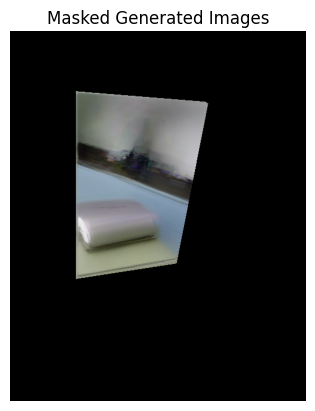

In [24]:
def compute_median(ball_images):
    all_images = np.stack(ball_images, axis=0)
    median_image = np.median(all_images, axis=0).astype(np.uint8)
    return median_image

median_img = compute_median(masked_gen_images)
plt.imshow(cv2.cvtColor(median_img, cv2.COLOR_BGR2RGB))
plt.title("Masked Generated Images")
plt.axis('off')
plt.show()


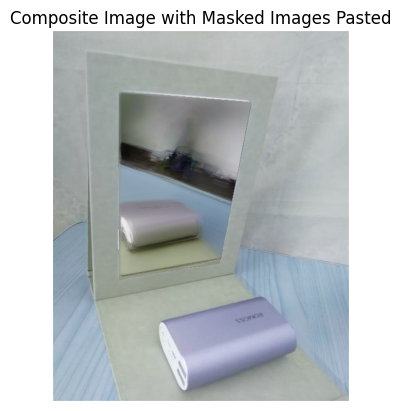

In [25]:
# Use the masked_image, median_img, and ref_image to paste masked_image on ref_image
# Create a copy of the reference image to modify
composite_image = ref_image.copy()

# Iterate over each masked image and paste it onto the reference image
# for masked_image in masked_gen_images:
    # Where the mask is not zero, replace the pixel in the composite image
composite_image[median_img != 0] = median_img[median_img != 0]
# Display the composite image
plt.imshow(cv2.cvtColor(composite_image, cv2.COLOR_BGR2RGB))
plt.title("Composite Image with Masked Images Pasted")
plt.axis('off')
plt.show()


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.38it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.34it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.33it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.31it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.30it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.28it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.27it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.24it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.24it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.21it/s]


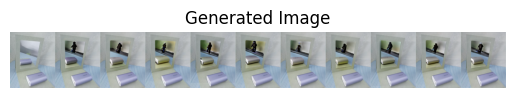

In [26]:
import random

gen_images = []
for i in range(10):
    random.seed(random.randint(0, 10000))
    gen_image = inference_single_image(composite_image, ref_mask, tar_image, tar_mask)
    # gen_path = os.path.join(save_dir, image_name)
    gen_images.append(gen_image)

vis_image = cv2.hconcat([ref_image]+gen_images)

plt.imshow(cv2.cvtColor(vis_image, cv2.COLOR_BGR2RGB))
plt.title("Generated Image")
plt.axis('off')  # Hide the axis
plt.show()

In [27]:
import os

# Define the directory to save the generated images
save_dir = "/data/om/reflection_anydoor/dataset/generated_images"

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Save the concatenated visualization image
save_path = os.path.join(save_dir, "vis_image.png")
cv2.imwrite(save_path, cv2.cvtColor(vis_image, cv2.COLOR_RGB2BGR))

print(f"Visualization image saved at: {save_path}")


Visualization image saved at: /data/om/reflection_anydoor/dataset/generated_images/vis_image.png


In [28]:
def generate_images(ref_image, ref_mask, tar_image, tar_mask):
    gen_images = []
    for i in range(10):
        random.seed(random.randint(0, 10000))
        gen_image = inference_single_image(ref_image, ref_mask, tar_image, tar_mask)
        # gen_path = os.path.join(save_dir, image_name)
        gen_images.append(gen_image)
    return gen_images


In [29]:
def save_images(save_dir, images):
    os.makedirs(save_dir, exist_ok=True)
    for i, image in enumerate(images):
        save_path = os.path.join(save_dir, f"image{i}.png")
        cv2.imwrite(save_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))


# save_dir = "/data/om/reflection_anydoor/dataset/test/generated_images/22_512x640"
# save_images(save_dir, gen_images)


In [30]:
mask_dir = "/data/om/reflection_anydoor/dataset/test/masks"
images_dir ="/data/om/reflection_anydoor/dataset/test/images"
gen_dir = "/data/om/reflection_anydoor/dataset/test/generated_images"

In [31]:
for file in os.listdir(images_dir):
    base, _ = os.path.splitext(file)
    save_dir = os.path.join(gen_dir, base)
    ref_image, ref_mask, tar_image, tar_mask = prepare_model_input(
        image_name=file, 
        masks_dir=mask_dir, 
        images_dir=images_dir)

    gen_images = generate_images(ref_image, ref_mask, tar_image, tar_mask)
    save_images(save_dir, gen_images)
    break
    # print(save_dir)

    

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.33it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.33it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.29it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.34it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.33it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.31it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.30it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.29it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.27it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.26it/s]


In [16]:
base, _ = os.path.splitext("22_512x640.png")


In [17]:
base

'22_512x640'